In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dataset
https://insights.stackoverflow.com/survey

In [2]:
results_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_public.csv", index_col='ResponseId')
schema_df = pd.read_csv("stack-overflow-developer-survey-2023/survey_results_schema.csv", index_col='qname')

In [3]:
# check the question corresponding to the column name
# survey_results_schema & survey_results_public has some different question name
schema_df.loc['NEWSOSites', 'question']

'Which of the following Stack Overflow sites have you visited? Select all that apply. *'

# Community

## Stack Overflow site use

### Visiting sites across Stack Overflow and Stack Exchange

#### All Respondents
https://survey.stackoverflow.co/2023/#stack-overflow-site-use-newso-sites

In [50]:
sites_list = []

for sites in results_df['NEWSOSites'].dropna().unique():
    for site in sites.split(';'):
        if site in sites_list:
            pass
        else:
            sites_list.append(site)

# we can't use .str.contains() here because other contains the same word
# in this case Stack Overflow
# so we need to check the value from the list of splited values
def counter(string):
    global c
    global site
    if site in string.split(';'):
        c+=1

sites_counts_list = []
for site in sites_list:
    c=0
    results_df['NEWSOSites'].dropna().apply(counter)
    sites_counts_list.append(c)

<Axes: >

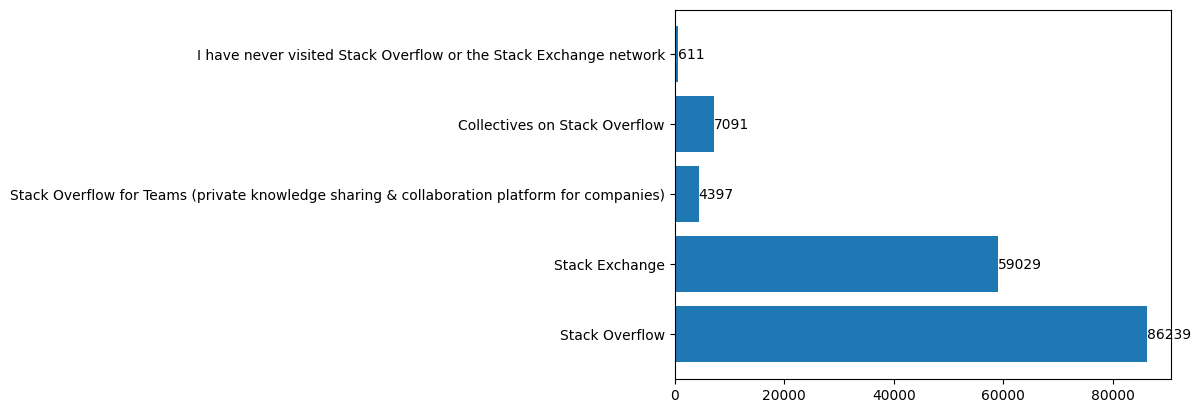

In [51]:
fig, ax = plt.subplots()
bars = ax.barh(sites_list, sites_counts_list)
ax.bar_label(bars)
ax

#### Professional Developers
https://survey.stackoverflow.co/2023/#stack-overflow-site-use-newso-sites-prof

In [54]:
pro_df = results_df.loc[results_df['MainBranch'] == 'I am a developer by profession', ['NEWSOSites']]

# we can't use .str.contains() here because other contains the same word
# in this case Stack Overflow
# so we need to check the value from the list of splited values
def counter(string):
    global c
    global site
    if site in string.split(';'):
        c+=1

pro_sites_counts_list = []
for site in sites_list:
    c=0
    pro_df['NEWSOSites'].dropna().apply(counter)
    pro_sites_counts_list.append(c)

<Axes: >

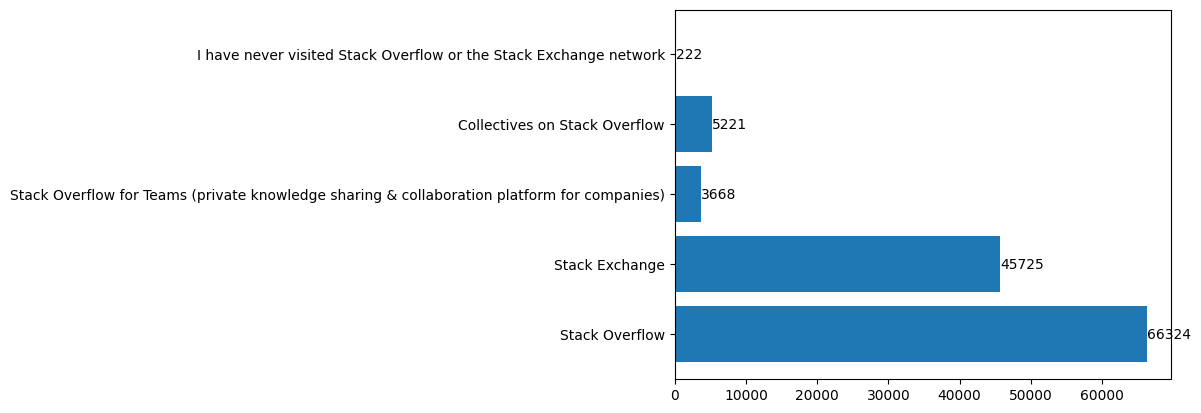

In [55]:
fig, ax = plt.subplots()
bars = ax.barh(sites_list, pro_sites_counts_list)
ax.bar_label(bars)
ax

#### Learning to Code
https://survey.stackoverflow.co/2023/#stack-overflow-site-use-newso-sites-learn

In [57]:
learning_df = results_df.loc[results_df['MainBranch'] == 'I am learning to code', ['NEWSOSites']]

# we can't use .str.contains() here because other contains the same word
# in this case Stack Overflow
# so we need to check the value from the list of splited values
def counter(string):
    global c
    global site
    if site in string.split(';'):
        c+=1

learning_sites_counts_list = []
for site in sites_list:
    c=0
    learning_df['NEWSOSites'].dropna().apply(counter)
    learning_sites_counts_list.append(c)

<Axes: >

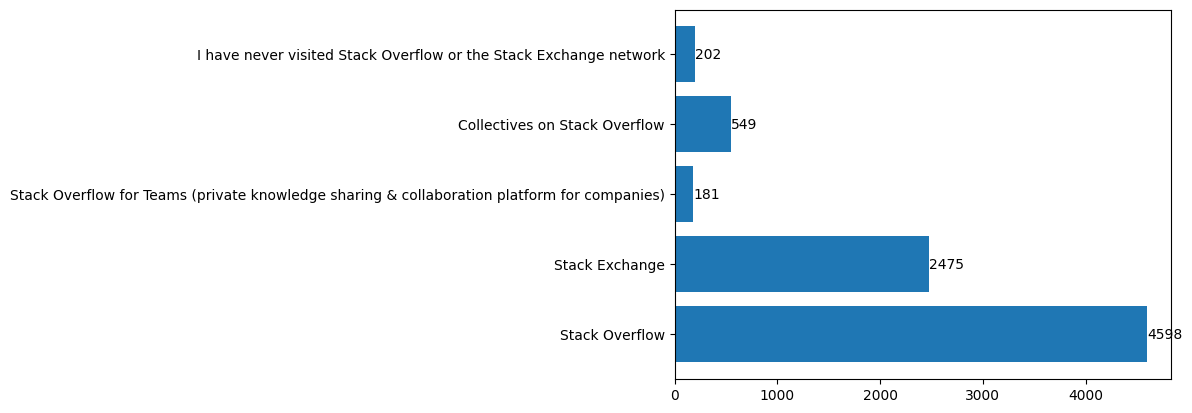

In [58]:
fig, ax = plt.subplots()
bars = ax.barh(sites_list, learning_sites_counts_list)
ax.bar_label(bars)
ax

### Frequency of visiting Stack Overflow
https://survey.stackoverflow.co/2023/#frequency-of-visiting-stack-overflow

<Axes: >

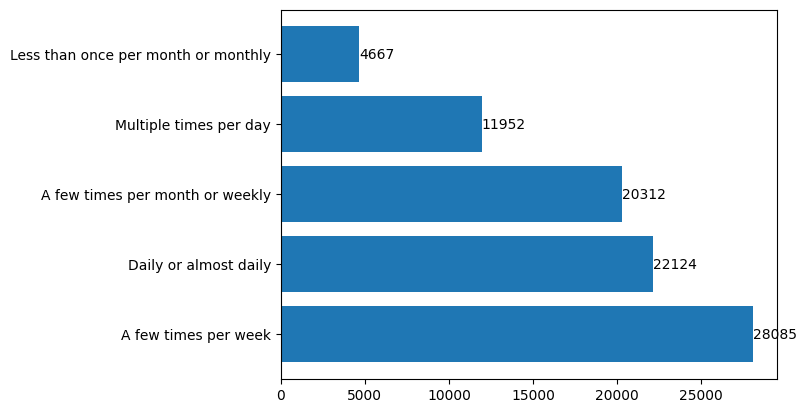

In [62]:
fig, ax = plt.subplots()
bars = ax.barh(results_df['SOVisitFreq'].value_counts().index, results_df['SOVisitFreq'].value_counts().values)
ax.bar_label(bars)
ax

### Have an account on Stack Overflow
https://survey.stackoverflow.co/2023/#have-an-account-on-stack-overflow

<Axes: >

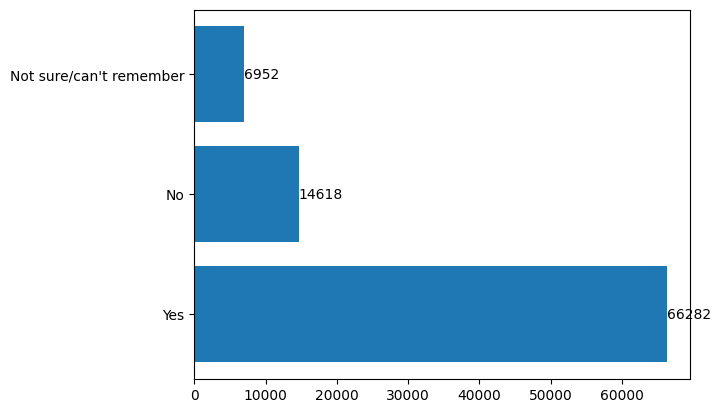

In [65]:
fig, ax = plt.subplots()
bars = ax.barh(results_df['SOAccount'].value_counts().index, results_df['SOAccount'].value_counts().values)
ax.bar_label(bars)
ax

### Frequency of participation on Stack Overflow
https://survey.stackoverflow.co/2023/#have-an-account-on-stack-overflow

<Axes: >

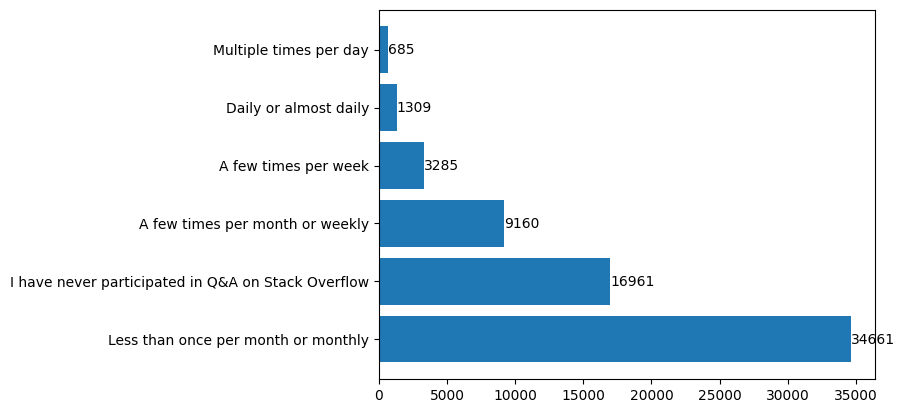

In [68]:
fig, ax = plt.subplots()
bars = ax.barh(results_df['SOPartFreq'].value_counts().index, results_df['SOPartFreq'].value_counts().values)
ax.bar_label(bars)
ax

### Feel like a part of the Stack Overflow community

#### All Respondents
https://survey.stackoverflow.co/2023/#stack-overflow-site-use-so-comm

<Axes: >

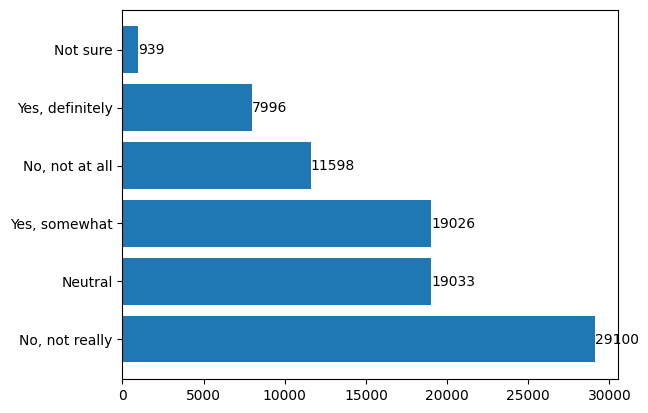

In [72]:
fig, ax = plt.subplots()
bars = ax.barh(results_df['SOComm'].value_counts().index, results_df['SOComm'].value_counts().values)
ax.bar_label(bars)
ax

#### By Age
https://survey.stackoverflow.co/2023/#stack-overflow-site-use-so-comm-age

<Axes: >

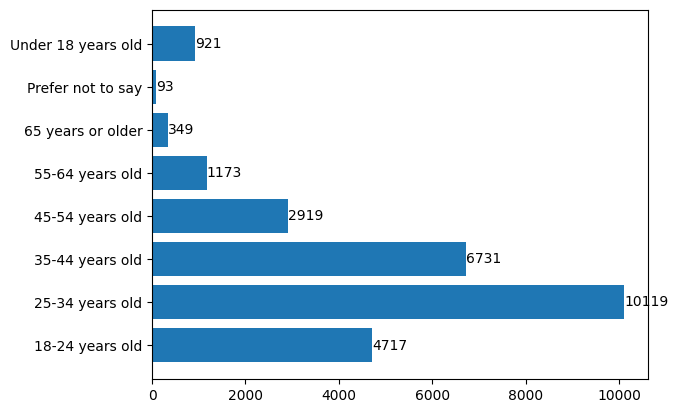

In [106]:
# who consider themselves definitely or somewhat part
flt1 = results_df['SOComm'] == 'Yes, definitely'
flt2 = results_df['SOComm'] == 'Yes, somewhat'

age_df = results_df[flt1 | flt2][['SOComm', 'Age']]
age_grp_df = age_df.groupby('Age').describe()

fig, ax = plt.subplots()
bars = ax.barh(age_grp_df.index, age_grp_df[('SOComm',  'count')])
ax.bar_label(bars)
ax